# Singing Like a Pop Star!

If you've ever listed to songs like Cher's "Believe", Daft Punk's "One More Time", or literally anything by T-Pain, you've heard a machine called an AutoTune.  It makes people's voices sound synthetic, and allows them to stay on perfect pitch by messing around with the output of their voice.  

But did you know... it's all done using DFT!!!  And we're going to create one now.

## Instructions

This programming exercise will walk you through all the steps, borrow from what we've learned, and produce a final prodct.  If at any point you get stuck on one block of code or it doesn't create the correct output, you can skip that block and move onto the next.  To allow for this, we've uploaded our versions of the "check points" from each block of code.

Say you've gotten stuck on $Block_i$.  On Canvas we have files called $Output\_Block\_i$.  Download them, and read them as input to $Block_{i+1}$.  Then continue writing and running your code for $Block_{i+1}$.  If you do this, you may lose points on $Block_i$ since it is uncompleted or incorrect, but you are still elligable for full points on $Block_{i+1}$.  This way, you can complete the code in sections in case you get stuck.  

In order to receive a perfect score on the coding part this problem, you must be able to run your code correctly from beginning to end (and get the correct output) without loading in any of our check points.  


There are also free response parts of these problems.  Here, you must answer questions about your code underneath where the code is written.  You can do this in Markdown format, and these will be graded for correctness.

Before we do this, we need to define a function to playback your signal.  Just run the code below

In [3]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

def playAudio(inputData,fs):
    # Open stream with correct settings
    p = pyaudio.PyAudio()

    samples = inputData# fill in with name of your new numSamples length array
    rateRecord = fs# fill in with the frequency of sampling of this signal

    stream = p.open(format=pyaudio.paFloat32,
                             channels=1,
                             rate=rateRecord,
                             output=True
                   )
    # Assuming you have a numpy array called samples
    print('Begin listening')
    data = samples.astype(np.float32).tostring()
    stream.write(data)

    stream.stop_stream()
    stream.close()
    p.terminate()

    print('Playback ended')

## 1) Collecting and breaking up your data

This part of the code will record yourself saying/singing something for 10 seconds.  After collecting this entire time series, we will break it up into smaller segmenets, each of which is approximate $\frac{1}{8}$ second long.  We will then analyze each segment separately.

There are two blocks of code:
- in block 1, you are given barebones code of how to record yourself.  It is up to you to determine the appropriate missing values. You must:
    - record yourself for 10 seconds
    - sample at a Nyquist sampling rate of human voice.  Recall, the maximum frequency signal that the human voice can generate is 3400 Hz, so you can use that as a band limit of the human voice.
    - plot what your signal looks like over the course of this 10 second recording, with an x-axis variable of time in seconds.
    
- in block 2, write a loop that will break up this signal into $\frac{1}{8}$ second patches.  You must:
    - set a variable for number of samples per patch
    - store each patch as either a row of a matrix or as an element of a list
    - plot the 20th patch of the signal with an x-axis variable of time in seconds (note, this patch is mostly silent, you can choose a different patch to follow throughout the exercise)

In [4]:
# Record voice

fs = 8000 # sampling rate

T = 10# time duration of signal
    
numSamples = T * fs # Total number of samples collected
    
p = pyaudio.PyAudio()

print('Recording')
    
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs, input=True, frames_per_buffer=numSamples)

data = stream.read(numSamples)
numpydata = np.frombuffer(data, dtype=np.float32)

# close stream
stream.stop_stream()
stream.close()
p.terminate()

print('Finished Recording')


ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Recording
Finished Recording


In [5]:
playAudio(numpydata,8000)

ALSA lib pcm_dsnoop.c:641:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackSh

Begin listening
Playback ended


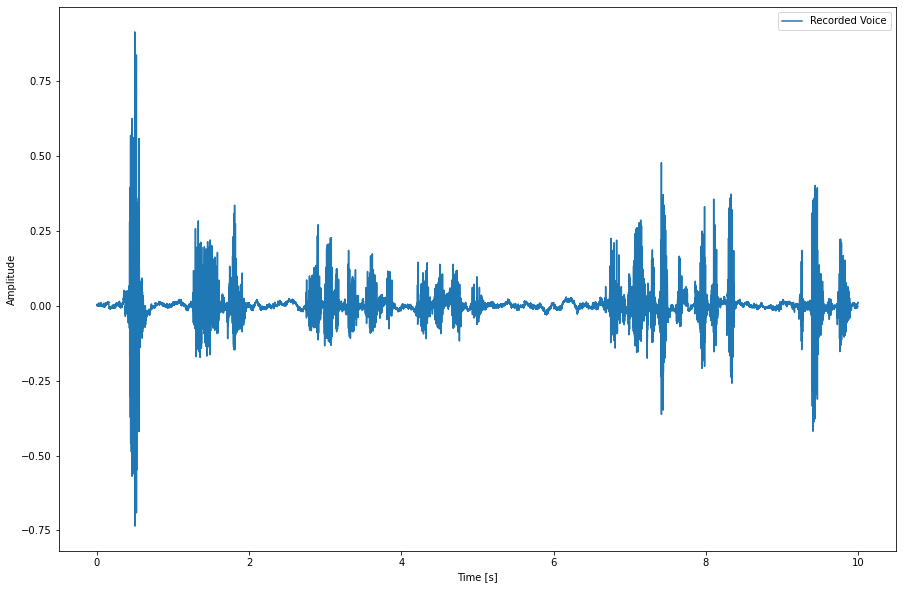

In [6]:
# Create plot
time = np.linspace(0, len(numpydata) / 8000, len(numpydata))


plt.figure(figsize=(15, 10))
plt.plot(time, numpydata, label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [8]:
len(numpydata)

80000

In [7]:
# Break into 1/8 second increments
# I choose 8000 as a safe Nyquist sample rate for human voice
#so 1/8 second patch would be 1000 samples in a patch every 
#1 sec is 8000 samples, 1/8 sec = 1000 samples / patch

samples_per_patch = int(fs / 8)

patches = []
for n in np.arange(10 * 8):
    patches.append(numpydata[n*samples_per_patch :(n+1)*samples_per_patch])

In [10]:
samples_per_patch

1000

In [44]:
len(patches)

80

In [43]:
len(patches[0])

1000

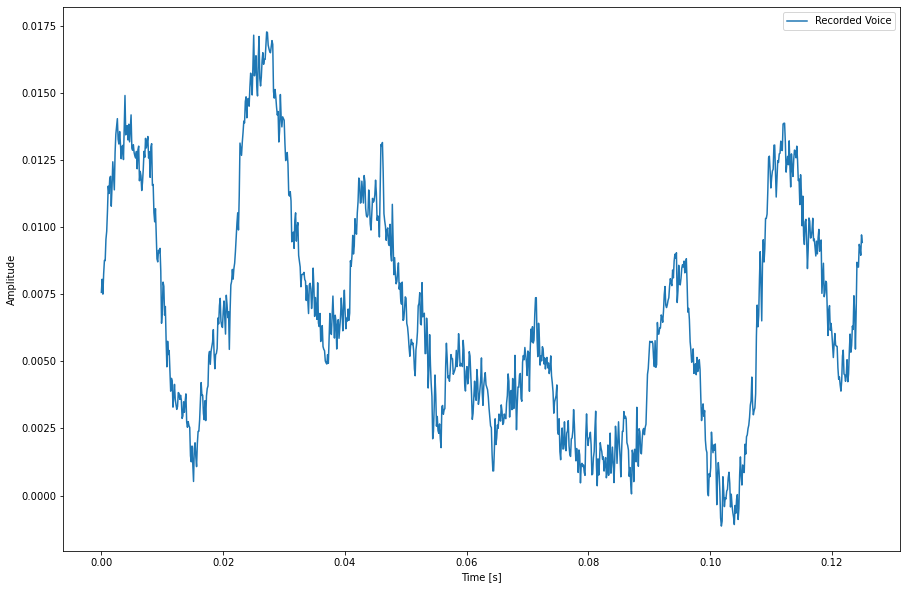

In [8]:
time = np.linspace(0, len(patches[19]) / 8000, len(patches[19]))
plt.figure(figsize=(15, 10))
plt.plot(time, patches[19], label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## 2) Working with you data in DFT space

This part of the code will take the FFT on each patch and analyze the patches

There are two blocks of code:
- in block one, take the FFT of each patch and store it in a new matrix or list.  You must:
    - take the fft of each patch
    - plot the magnitude of the frequency coefficients for the fifth patch.  Plot the shifted DFT so that the plot is centered at zero.   The x-axis variable must be correctly set and labeled in terms of frequency (i.e., not k).  Recall, you know what the max frequency should be from how you sampled.

- in block two, filter each patch in the frequency domain by only keeping peaks greater than $\|x\|$.  You must:
    - set the threshold for peak filtering for each patch
    - store the new filtered DFTs of each patch.  Note, this threshold should remove most of the signal, but not everything.  IF this is not the case when you plot the filtered DFTs, please look further into how you threshold the coefficients.
    - plot the real part of the filtered DFT of the 20th patch
    
There is also one block of answering a question:
- why does the threshold recommended make sense for finding peaks in the frequency domain?  Recall that Python's FFT does the unnormalized FFT, whereas we discuss the normalized DFT which is an orthonormal basis.

In [74]:
1/T

99.9

In [9]:
N = 1000  # length of patches is 1000 samples
t = np.linspace(0, 0.125, N) #every patch is 0.125 seconds long
T = t[1] - t[0]  # sampling interval 

# 1/T = frequency
# Highest f_0 signal frequency we can represent is f_s / 2
fs_shifted = np.linspace(-1/(2*T), 1/(2*T), N)
k = np.linspace(0,N-1,N)  # f = k/(N*T)

In [11]:
len(dft_patches[0])

1000

In [10]:
# DFT of each patch

dft_patches = []

for n in patches:
    n_dft = np.fft.fft(n,norm = 'ortho')
    dft_patches.append(n_dft)

Plotting 9th patch because there is a variety of amplitudes, we can verify they are correctly filtered out

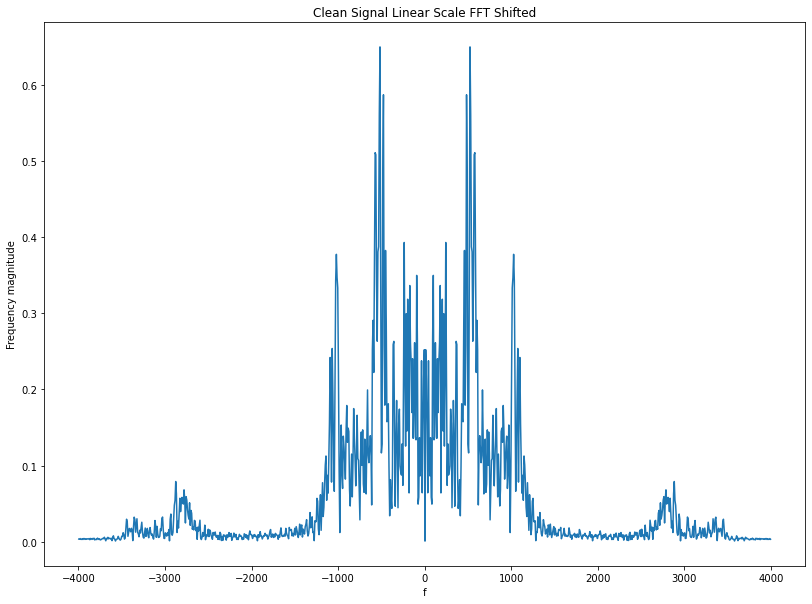

In [13]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(dft_patches[4])))

In [97]:
(np.abs(dft_patches[5]) > 0.4) * dft_patches[0]

array([ 0.        +0.j        ,  0.        -0.j        ,
        0.        -0.j        , -0.        +0.j        ,
        0.        -0.j        ,  0.        -0.j        ,
        0.        +0.j        ,  0.        -0.j        ,
        0.        +0.j        ,  0.        -0.j        ,
        0.        -0.j        ,  0.        -0.j        ,
        0.        -0.j        ,  0.        -0.j        ,
       -0.00671915-0.0037054j ,  0.        -0.j        ,
        0.        -0.j        ,  0.        +0.j        ,
        0.        -0.j        ,  0.        +0.j        ,
        0.        -0.j        ,  0.        -0.j        ,
        0.        -0.j        ,  0.        -0.j        ,
        0.        -0.j        , -0.        +0.j        ,
        0.        +0.j        ,  0.        -0.j        ,
       -0.00352237-0.001772j  , -0.00217389-0.00150553j,
       -0.00202352-0.00276098j,  0.        -0.j        ,
       -0.        +0.j        , -0.        +0.j        ,
       -0.        +0.j        ,

In [34]:
# Filtering DFT


filtered_dft_patches = []
for n in dft_patches:
    threshhold = 0.1 * np.linalg.norm(n)
    n_dft = (np.abs(n) > threshhold) * n
    filtered_dft_patches.append(n_dft)

In [19]:
len(filtered_dft_patches)

80

20th patch was empty so I just used the one from patch 5 above, we can see all magnitudes greater than threshold 
have been kept

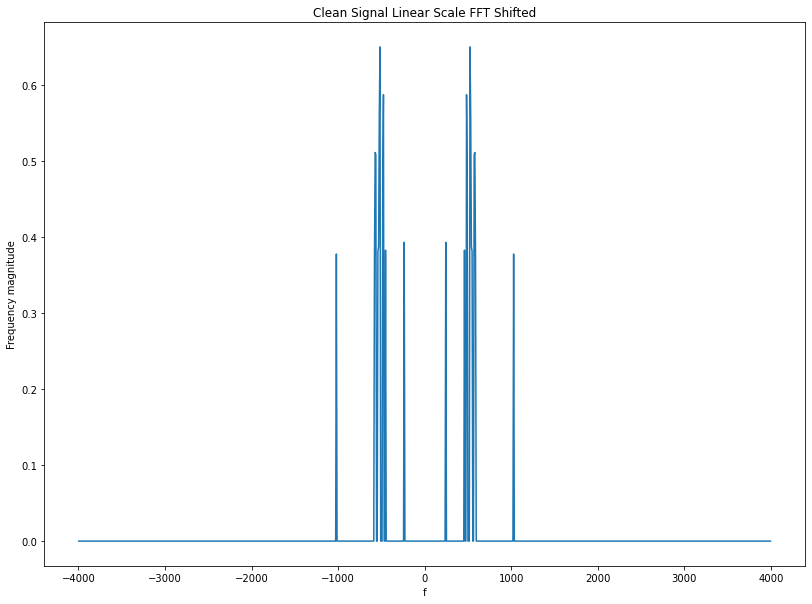

In [35]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(filtered_dft_patches[4])))

Answer: 

Because the basis is orthonormal using a scaled norm of the signal gives a good approximation for filtering out noise, peaks that are not noise shoud lie about the norm.

## 3) Listen to Filtered Signal

In this part, we'll piece the signal back together and listen to how it sounds after the filtering.

There are two blocks of code:
- in block one, make your new list of patches into one long vector.  You must:
    - take the inverse DFT of each patch
    - turn the segments back into one vector of size numSamples
    - make sure to remove any imaginary part of the signal (which would only come from numerical artifacts of the previous steps)
    - plot the entire signal with x-axis variable of time in seconds

- in block two, write your signal into a format you can listen to.  You must:
    - set samples variable to be new filtered vector
    - set the sampling rate for re-recording your audio file
    - Note: if you're having trouble hearing it, multiply your signal by some constant greater than 1 to increase the amplitude (which makes it louder)
    
There is also one block of questions:
- what does the filtered signal sound like?  And how is it different from the original signal

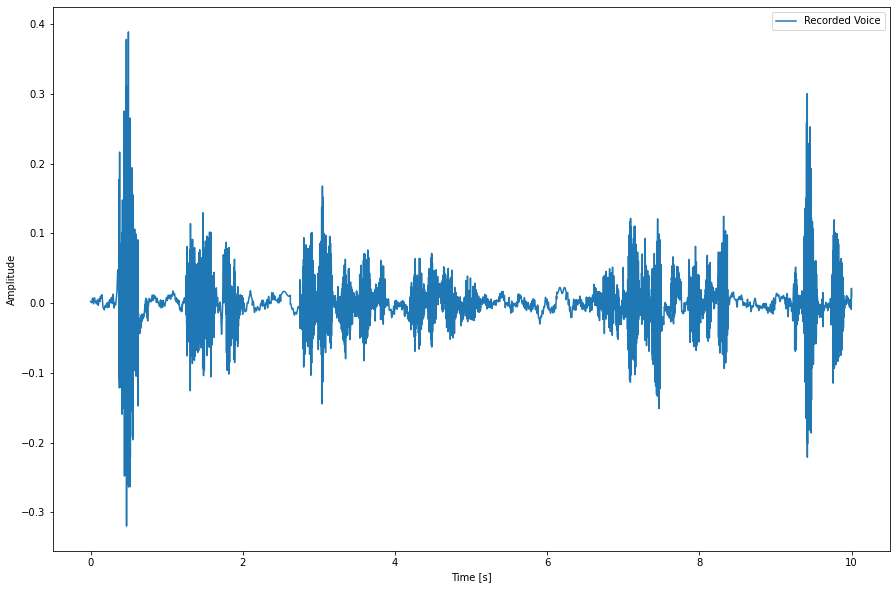

In [36]:
# Return to one vector
inverse_patches = []

for n in filtered_dft_patches:
    #g = np.fft.ifft(g_hat_filter, norm="ortho")
    n_dft = np.fft.ifft(n, norm = 'ortho')
    inverse_patches.append(np.real(n_dft))
    
    
rebuild_signal = np.array(inverse_patches).flatten()

time = np.linspace(0, len(numpydata) / 8000, len(numpydata))
plt.figure(figsize=(15, 10))
plt.plot(time,rebuild_signal , label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [37]:
# Play Filtered Data
playAudio(rebuild_signal,8000)



ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Begin listening
Playback ended


All of the background noise is gone but my voice sounds kind of muffled, there is much less variance in the range of pitch in my voice. 

## 4) Working with noisier signals

Now we are going to add artificial noise to the signal and re-filter it

There are four blocks of code:

- in block one, add guassian noise to your signal.  You want to set the standard deviation of the noise so that the $SNR_{db}$ of the entire signal is 5.  Recall, $SNR_{db} = 10\log_{10}(P_s / P_n)$ and $P_n \approx \sqrt{N}\sigma$, the standard deviation of the noise.  You must:
    - determine the appropriate $\sigma$, and verify this gives the correct SNR
    - add noise to the entire signal
    - verify that the SNR is in fact close to 5
    - break this new signal into patches (or you can directly add noise to each patch instead of working with the full signal)
    - plot the 20th patch as a function of time

- in block two, listen to this new noisy signal.  You can reuse the code you wrote in part 3.  You must:
    - show code that demonstrates you listened to the signal

- in block three, take the DFT of each patch and apply the same filter as above.  You can reuse code from part 2.  You must:
    - show code that demonstrates you filtered each patch
    - plot the magnitude of the filtered DFT coefficients for the 20th patch

- in block four, take the inverse DFT of each patch, turn it into one long signal, and listen to your new signal.  You can reuse code from part 2 and 3.  You must:
    - plot the entire signal, with x-axis of time in seconds
    - show code that demonstrates you listened to your signal
    
There is also one block of questions:
- how does this new threshold relate to the threshold of your filtered signal from part 3?  Explain how much you've increased your threshold by.  
- why does the song sound noisier in the patches where your voice is quieter?

Decibal SNR:  -1.621452865154713


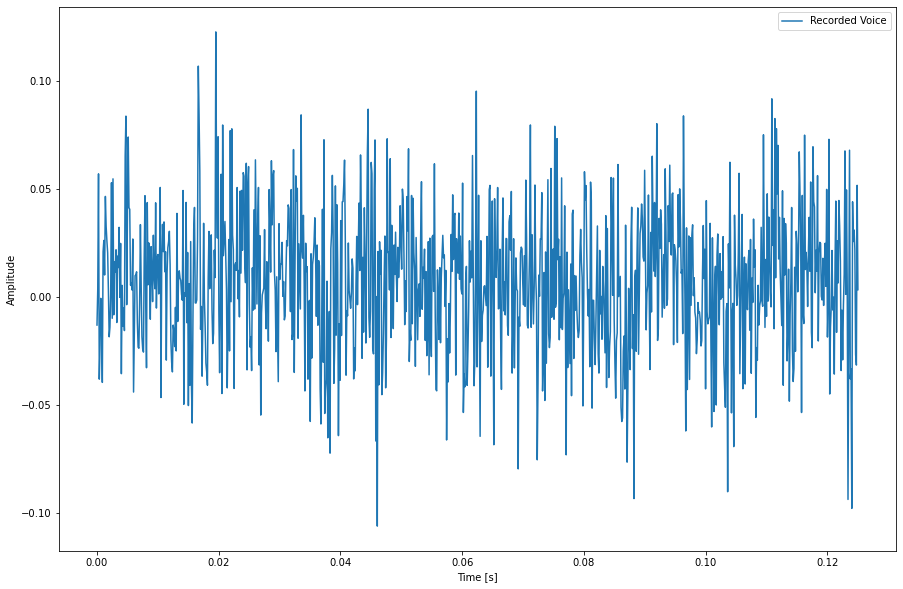

In [60]:
# Find noise
n = 0.032*np.random.randn(len(rebuild_signal))

#simga = 0.032
f = rebuild_signal + n

# Signal noise
P_s = np.linalg.norm(rebuild_signal)
P_n = np.linalg.norm(n)

SNR_db = 10*np.log(P_s/P_n)

print('Decibal SNR: ',SNR_db)

samples_per_patch = int(fs / 8)

noise_patches = []
for n in np.arange(10 * 8):
    noise_patches.append(f[n*samples_per_patch :(n+1)*samples_per_patch])
    
    
time = np.linspace(0, len(noise_patches[19]) / 8000, len(noise_patches[19]))


plt.figure(figsize=(15, 10))
plt.plot(time, noise_patches[19], label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [39]:
# Play Noisy Data
playAudio(f,8000)

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Begin listening
Playback ended


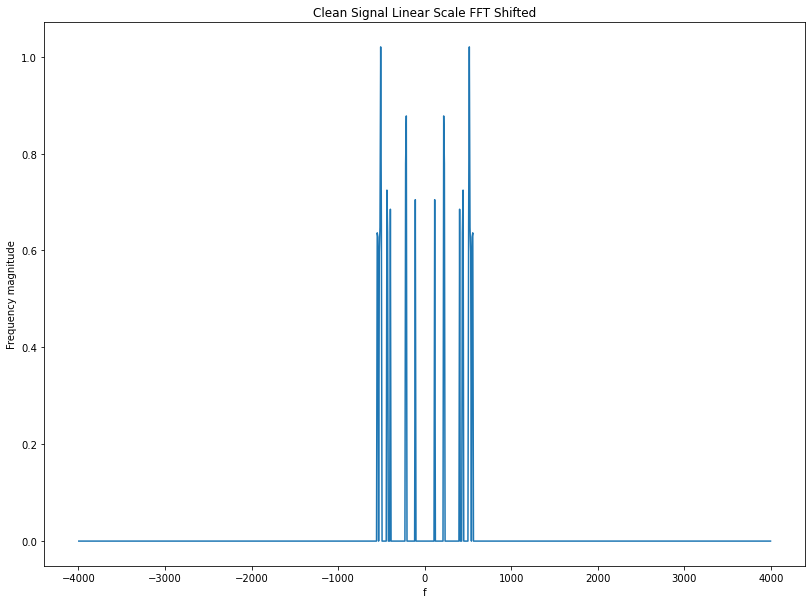

In [67]:
# DFT of each patch
dft_noise_patches = []

for n in noise_patches:
    n_dft = np.fft.fft(n,norm = 'ortho')
    dft_noise_patches.append(n_dft)





filtered_noise_dft_patches = []
for n in dft_noise_patches:
    threshhold = 0.2 * np.linalg.norm(n)
    n_dft = (np.abs(n) > threshhold) * n
    filtered_noise_dft_patches.append(n_dft)
    
    
    
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(filtered_dft_patches[3])))

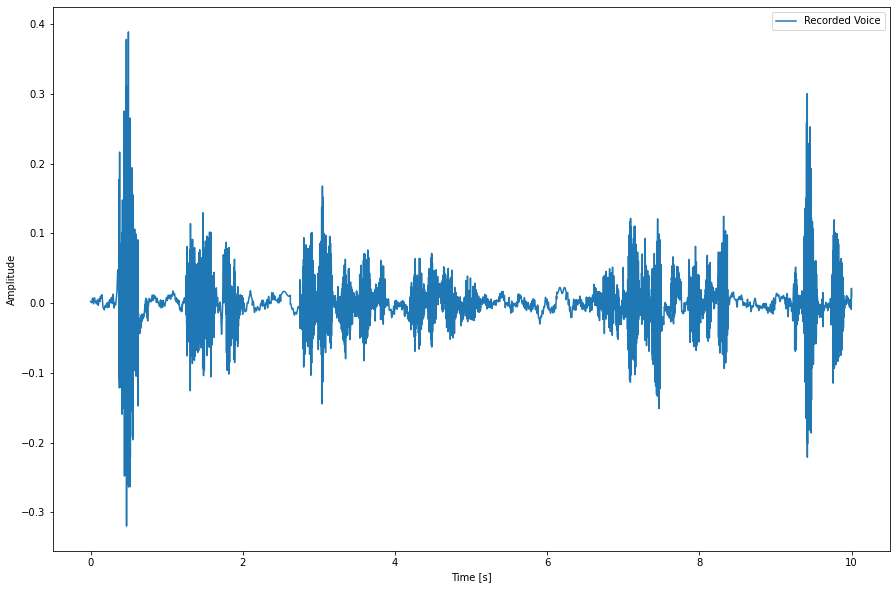

In [68]:
# Return to one vector
inverse_noise_patches = []

for n in filtered_noise_dft_patches:
    #g = np.fft.ifft(g_hat_filter, norm="ortho")
    n_dft = np.fft.ifft(n, norm = 'ortho')
    inverse_noise_patches.append(np.real(n_dft))
    
    
rebuild_noise_signal = np.array(inverse_patches).flatten()

time = np.linspace(0, len(numpydata) / 8000, len(numpydata))
plt.figure(figsize=(15, 10))
plt.plot(time,rebuild_noise_signal , label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [42]:
playAudio(numpydata,8000)

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Begin listening
Playback ended


In [69]:
# Play Noise Filtered Data
playAudio(rebuild_noise_signal,8000)

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Begin listening
Playback ended


Answer:

I had to increase the threshold in able to filter out the white noise, I think this is because the noise 

The song is noisier in quite parts because we added noise to the signal, so instead of there being nothing there is now 'white' noise that sounds like static because we added it to signal from gaussian distribution.

## 5) Determine the main frequency of the signal you just created

Using the DFT of your original signal from part 2, determine the dominant frequency at which you sang your song.

There is three blocks of code:  

- in block one, we need to remove any artifacts of possibly very loud high frequency sounds (e.g., your computer fan).  To do this, we will use a low-pass filter along with the peaks we've already found.  You must:
    - build a low-pass filter on each patch that removes any sound greater than 1000Hz
    - filter your patches with the above low-pass filter
    - plot the magnitude of the frequencies of the 20th patch, with correctly labeled x-axis of frequency in Hz.  Focus in on the plot, so that the frequencies range from (-1000,1000) only

- in block two, find the first nonzero peak frequency of the low pass filtered DFT for each patch.  For each patch, store where that peak occurred in Hz.  You must:
    - demonstrate code that shows your finding the first peak per patch
    - convert that index to frequency in Hz and report the value for each patch (can store in an array)
    - plot this array to see how your voice was fluctuating during the song.  x-axis should be in terms of time in seconds
    
- in block three, put the patches back into one long array and listen to it.  You must:
    - demonstrate code that pieces the patches back together.  You can reuse code from part 3.
    - plot the full signal.
    - show code that demonstrates you listened to the signal
    
There is also two blocks of questions:

- are these larger than expected, smaller, about right?  Recall that middle-C, which is about the average pitch of a singing voice, is approximately 260 Hz.  Look at all your filtered DFTs in this range of less than 1000Hz.  Do you ever get peaks that are at double the frequency of the dominant peak?  Three times the frequency of the dominant peak?  These are called harmonics, and your voice naturally makes them.

- do you hear any strange artifacts when listening to this filtered signal?  Any idea why this would be?

In [190]:
len(dft_patches[0])

1000

In [70]:
# Low pass filter
low_pass_patches = []


#low_pass_filter = np.repeat(0,8000)
h_hat = np.ones(len(dft_patches[0]))
k_0 = 125
for n in dft_patches:
    n[k_0+1 : len(dft_patches[0])-k_0] = 0
    low_passed = n*h_hat
    low_pass_patches.append(low_passed)


In [80]:
fs_shifted = np.linspace(-1/(2*T), 1/(2*T), 1000)

In [283]:
print([1,2,3] + [4,5,6,7])

[1, 2, 3, 4, 5, 6, 7]


In [287]:
len(target1)

80

In [285]:
len(combined)

160

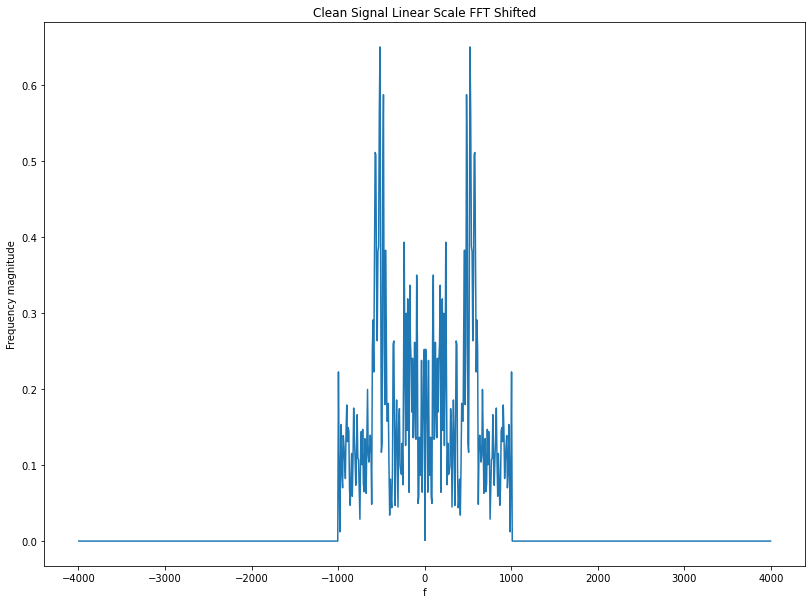

In [81]:

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(low_pass_patches[4])))

In [227]:
len(low_pass_patches[1])

1000

In [82]:
def find_first(arr):
    for n in arr:
        if np.abs(n) > 0:
            return np.abs(1000 *  n) / 80000 

In [83]:
# Find maximum peak in each patch
first_peaks = []
for n in low_pass_patches:
    first_peaks.append(find_first(n))

In [84]:
first_peaks

[0.0010465142008851342,
 0.0003400759780272892,
 0.0034078793638028285,
 0.006215021561022344,
 1.1514581882462482e-05,
 0.007257384652598,
 0.001931126879181287,
 9.687604524434813e-05,
 0.0038698726150713687,
 0.0003867868623250768,
 0.00032031390221985885,
 0.0009519135935200051,
 0.001398479796315403,
 0.00029363315041594615,
 0.001224961561595954,
 0.004205848662091725,
 0.0006648534683698928,
 0.0024209132860586466,
 4.2065978741642316e-05,
 0.0026282278260107246,
 0.005318055198105274,
 0.0036963364069236976,
 0.0005496342818354278,
 0.0008480351007355265,
 0.003491908282084907,
 0.0025748145943170738,
 0.0032558344620134557,
 0.0009001146306366744,
 0.0014106620130366044,
 0.0014076654879771153,
 0.004710746431564009,
 0.002647582100106687,
 0.000989006349023456,
 0.004219218535705419,
 0.0009763801691065435,
 0.0016744271921122725,
 0.005566411417706773,
 0.0027730036721416583,
 0.002768089285052797,
 0.0018274881738063267,
 0.0003940092985168849,
 0.0007152360017553379,
 0.00

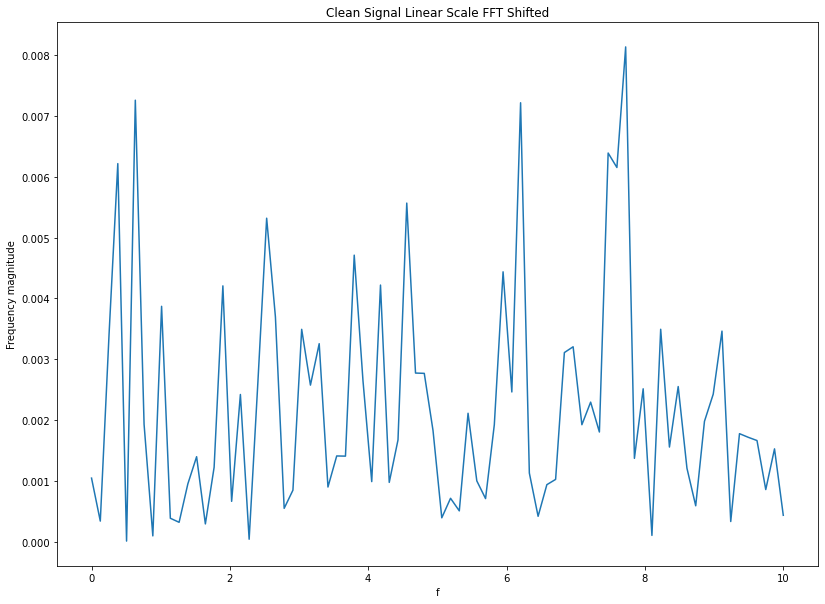

In [85]:
time = np.linspace(0, 10, 80)
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(time,first_peaks)

Answer: 

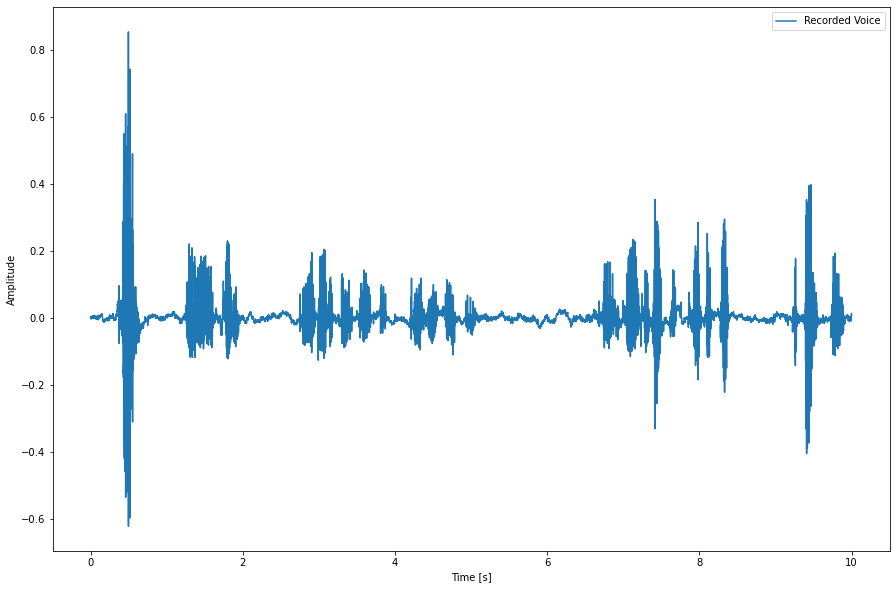

In [86]:
# Return to one vector
inverse_low_patches = []

for n in low_pass_patches:
    #g = np.fft.ifft(g_hat_filter, norm="ortho")
    n_dft = np.fft.ifft(n, norm = 'ortho')
    inverse_low_patches.append(np.real(n_dft))
    
    
rebuild_low_signal = np.array(inverse_low_patches).flatten()

time = np.linspace(0, len(numpydata) / 8000, len(numpydata))
plt.figure(figsize=(15, 10))
plt.plot(time,rebuild_low_signal , label="Recorded Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [87]:
# Play Noise Filtered Data
playAudio(rebuild_low_signal,8000)

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unloc

Begin listening
Playback ended


Answer:

I may have calculated frequencies wrong from indexes, I think my values are too small, there does seem to be peaks corresponding to when I spoke in the signal.I can see a trend of 2-3x peaks from the dominant peak. I can kind of heard these weird almost alien spaceship like beeping, It may be because some of the noise that fits into frequency range was not properly filtered out.